In [1]:
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
from pywt import wavedec

2023-11-18 04:06:36.329056: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-18 04:06:36.368841: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-18 04:06:36.368880: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-18 04:06:36.368920: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-18 04:06:36.375538: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-18 04:06:36.376175: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
data = pd.read_csv('../Preprocessing/test/db1/data_MfccDwtChromaCqtdb1L1.csv')
data.head()

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT_NEW/MVP/New_MVP_062.wav,-378.466705,70.777046,-15.043975,-10.483999,-7.787292,-10.019837,-10.438225,-10.765308,-11.529624,...,0.004576,0.007013,0.009191,0.009871,0.007580,0.004856,0.004364,0.004430,0.003150,MVP
1,../data/DWT_NEW/MVP/New_MVP_109.wav,-319.873901,86.987167,-4.425532,-24.986303,-16.058350,-17.620874,-21.183941,-13.546381,-13.906720,...,0.006113,0.007374,0.003911,0.004396,0.006237,0.002841,0.003259,0.001627,0.001817,MVP
2,../data/DWT_NEW/MVP/New_MVP_009.wav,-436.392487,96.536903,15.220769,-3.666383,-7.341067,-16.075756,-19.296213,-12.426279,-12.215953,...,0.001060,0.001288,0.002036,0.002741,0.003057,0.002324,0.001372,0.001019,0.001093,MVP
3,../data/DWT_NEW/MVP/New_MVP_177.wav,-260.900574,82.395615,-14.294676,-40.442722,-28.068470,-14.434702,-11.098033,-15.608220,-18.183039,...,0.040846,0.037475,0.030191,0.031350,0.024266,0.023387,0.018028,0.016594,0.014518,MVP
4,../data/DWT_NEW/MVP/New_MVP_069.wav,-437.852600,95.676224,9.383162,-12.113409,-9.554273,-10.383272,-10.062037,-8.767884,-12.414495,...,0.002557,0.003386,0.003017,0.003608,0.003812,0.002936,0.002787,0.003399,0.002704,MVP


In [23]:
# trim data mfcc
mfcc = data.iloc[:, 1:41]
# mean mfcc
mfcc_mean = mfcc.mean(axis=1)

# trim data chroma
chroma = data.iloc[:, 41:53]
# mean chroma
chroma_mean = chroma.mean(axis=1)

# trim data cqt
cqt = data.iloc[:, 53:113]
# mean cqt
cqt_mean = cqt.mean(axis=1)

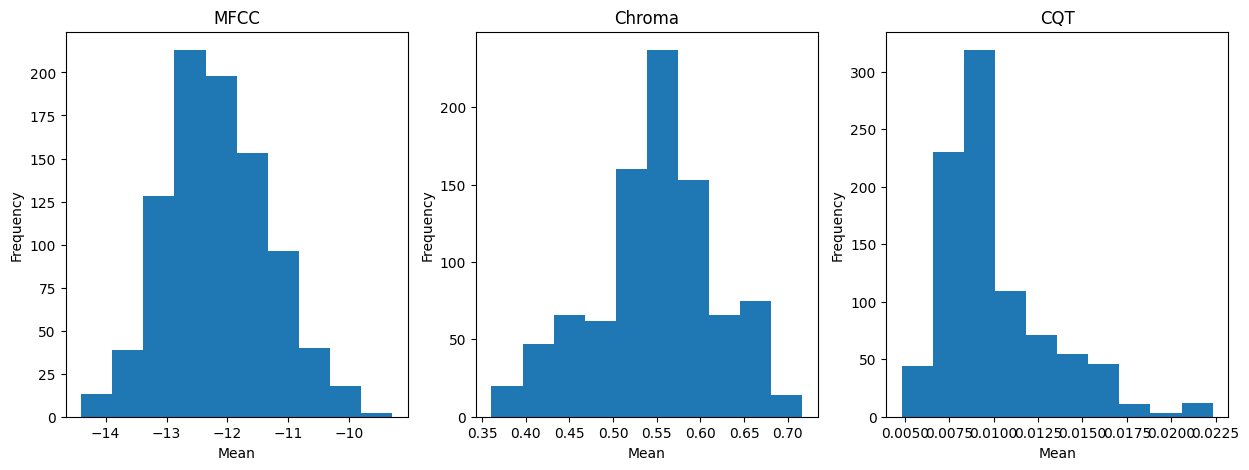

In [24]:
# dist plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('MFCC')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.hist(mfcc_mean, bins=10)
plt.subplot(1, 3, 2)
plt.title('Chroma')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.hist(chroma_mean, bins=10)
plt.subplot(1, 3, 3)
plt.title('CQT')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.hist(cqt_mean, bins=10)
plt.show()



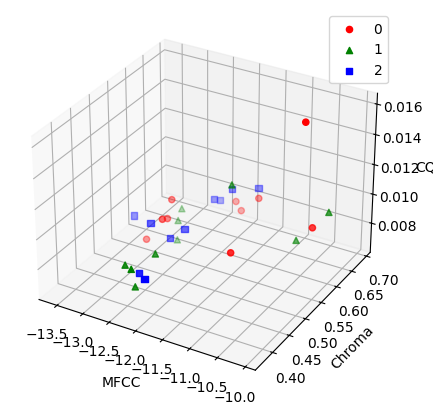

In [56]:
# scatter plot 3d mfcc, chroma, cqt. different color
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111, projection='3d')
# 3 color and marker
colors = ['r', 'g', 'b']
markers = ['o', '^', 's']

for i in range(3):
    ax.scatter(mfcc_mean[i*10:(i+1)*10], chroma_mean[i*10:(i+1)*10], cqt_mean[i*10:(i+1)*10], c=colors[i], marker=markers[i], label=i)
ax.legend()

ax.set_xlabel('MFCC')
ax.set_ylabel('Chroma')
ax.set_zlabel('CQT')
plt.show()


